# Working sheet 
## 01 - Simple linear regression with R
V01.01.00 - 2024-02-17

## Load data

Change the path and the file name in the following box.

In [1]:
library(readr)
df <- read_csv("data/class.csv")


Rows: 19 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (3): Age, Height, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Look at the structure and the head of the dataset.

In [2]:
str(df)

spc_tbl_ [19 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Name  : chr [1:19] "Alfred" "Alice" "Barbara" "Carol" ...
 $ Sex   : chr [1:19] "M" "F" "F" "F" ...
 $ Age   : num [1:19] 14 13 13 14 14 12 12 15 13 12 ...
 $ Height: num [1:19] 69 56.5 65.3 62.8 63.5 57.3 59.8 62.5 62.5 59 ...
 $ Weight: num [1:19] 112 84 98 102 102 ...
 - attr(*, "spec")=
  .. cols(
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   Height = col_double(),
  ..   Weight = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [3]:
head(df)

Name,Sex,Age,Height,Weight
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


Look at frequencies and descriptive statistics.

The summary() function is the first approach.

describe() from the Hmisc package is an alternative.

In [4]:
summary(df)

     Name               Sex                 Age            Height     
 Length:19          Length:19          Min.   :11.00   Min.   :51.30  
 Class :character   Class :character   1st Qu.:12.00   1st Qu.:58.25  
 Mode  :character   Mode  :character   Median :13.00   Median :62.80  
                                       Mean   :13.32   Mean   :62.34  
                                       3rd Qu.:14.50   3rd Qu.:65.90  
                                       Max.   :16.00   Max.   :72.00  
     Weight      
 Min.   : 50.50  
 1st Qu.: 84.25  
 Median : 99.50  
 Mean   :100.03  
 3rd Qu.:112.25  
 Max.   :150.00  

In [5]:
library(Hmisc)
describe(df)


Attache Paket: 'Hmisc'


Die folgenden Objekte sind maskiert von 'package:base':

    format.pval, units




df 

 5  Variables      19  Observations
--------------------------------------------------------------------------------
Name 
       n  missing distinct 
      19        0       19 

Alfred (1, 0.053), Alice (1, 0.053), Barbara (1, 0.053), Carol (1, 0.053),
Henry (1, 0.053), James (1, 0.053), Jane (1, 0.053), Janet (1, 0.053), Jeffrey
(1, 0.053), John (1, 0.053), Joyce (1, 0.053), Judy (1, 0.053), Louise (1,
0.053), Mary (1, 0.053), Philip (1, 0.053), Robert (1, 0.053), Ronald (1,
0.053), Thomas (1, 0.053), William (1, 0.053)
--------------------------------------------------------------------------------
Sex 
       n  missing distinct 
      19        0        2 
                      
Value          F     M
Frequency      9    10
Proportion 0.474 0.526
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd 
      19        0        6    0.961    13.32    1.731 
                                    

Plot the variables of interest with a scatter plot.

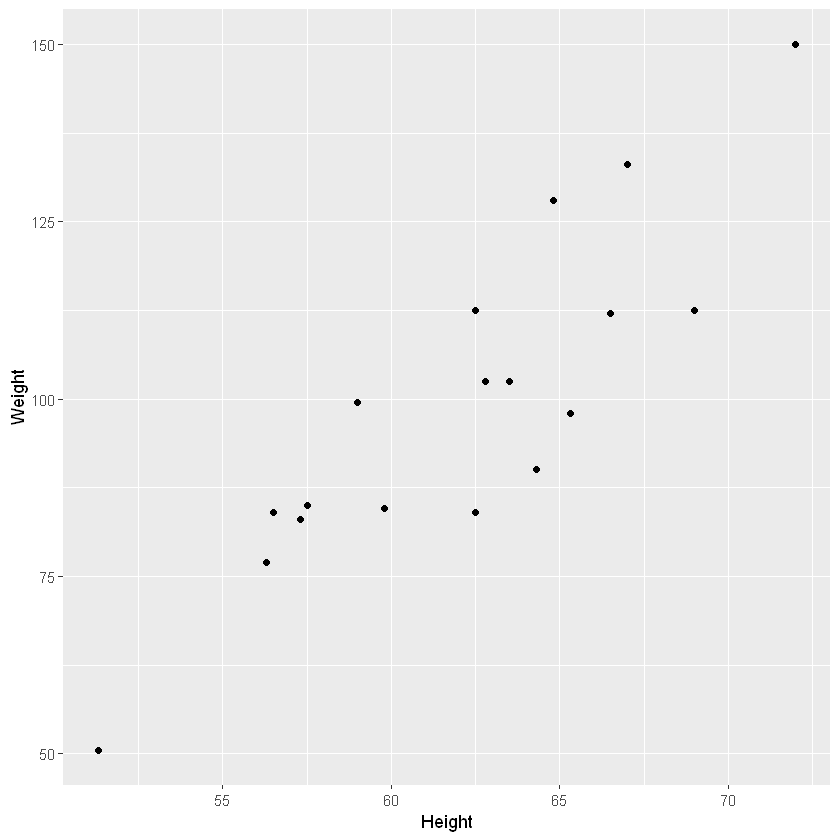

In [6]:
library(ggplot2)
ggplot(df, aes(x = Height, y = Weight)) +
  geom_point()


Look at the distribution with a QQ-plot.

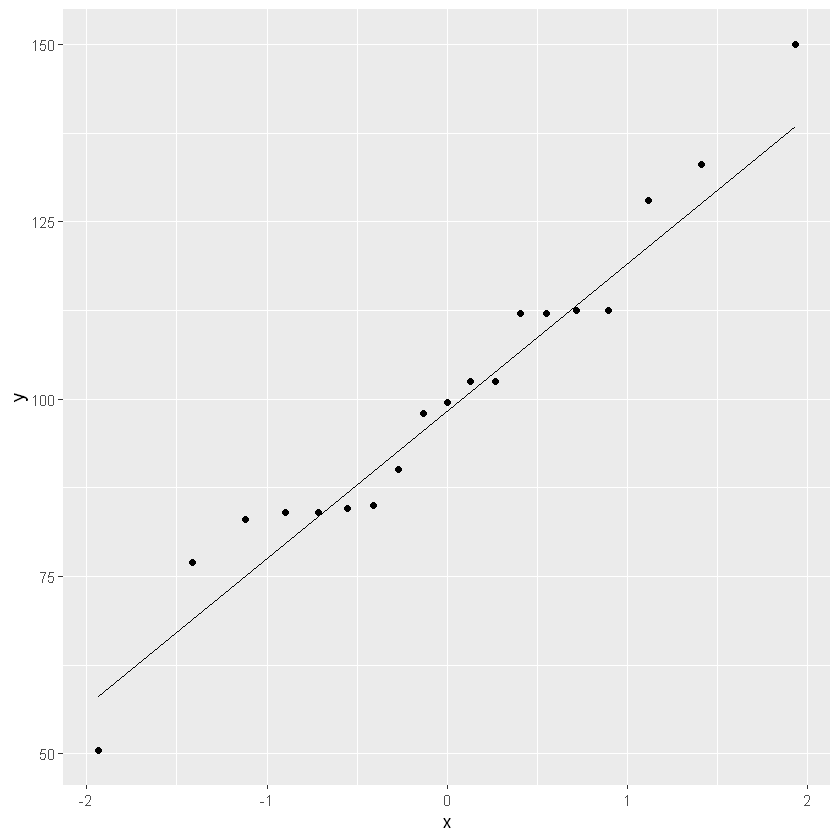

In [7]:
ggplot(df, aes(sample = Weight)) + 
  geom_qq() +
  geom_qq_line()

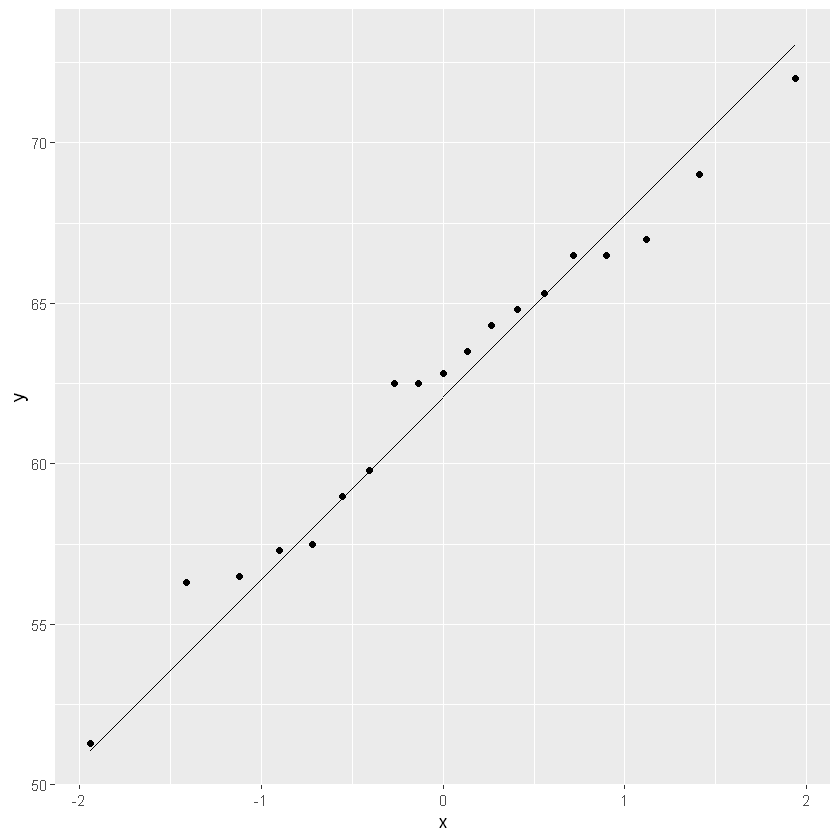

In [8]:
ggplot(df, aes(sample = Height)) + 
  geom_qq() +
  geom_qq_line()

## Assumptions of linear regression

- Linearity: There must be a linear relationship between the dependent and independent variables.
- Homoscedasticity: The residuals must have a constant variance.
- Normality: Normally distributed error.
- No auto correlation: The error component should have no auto correlation.
- No multicollinearity: No high correlation between the independent variables (for multiple linear regression).
- Independence of the observations: Result of the data generating mechanism


The linearity can be assessed by inspection of the scatter plot above.

For the next assumption the model has to be fitted to calculate the residuals. The residuals are the differences between the observed and the fitted values.

In [9]:
library(broom)
my_lm <- lm(Weight ~ Height, data = df)
df <- augment(my_lm)
head(df)


Weight,Height,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
112.5,69.0,126.00617,-13.5061701,0.14646301,10.97944,0.1454950639,-1.30222590
84.0,56.5,77.26829,6.7317083,0.12463349,11.43110,0.0292419306,0.64090788
98.0,65.3,111.57976,-13.5797581,0.07118815,11.02254,0.0603721796,-1.25514370
102.5,62.8,101.83218,0.6678176,0.05308494,11.57048,0.0001047528,0.06113186
102.5,63.5,104.56150,-2.0615036,0.05549092,11.55960,0.0010487655,-0.18894975
83.0,57.3,80.38752,2.6124840,0.10624886,11.55111,0.0036016287,0.24615612


Plot the residuals on the y-axis against the dependent variable on the x-axis to look for homoscedasticity.

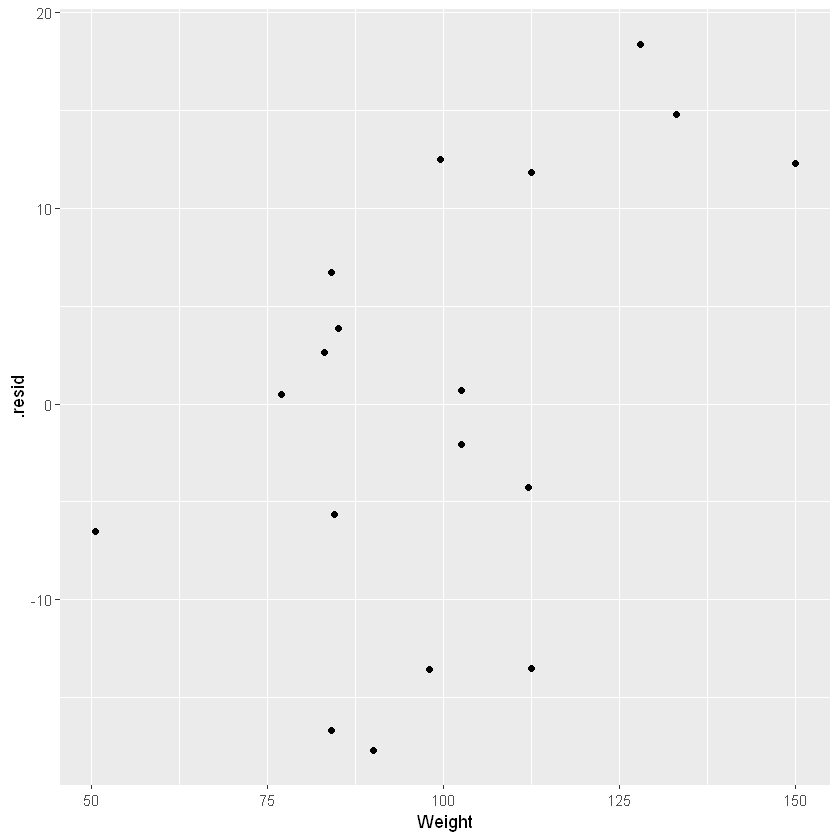

In [10]:
# Homoscedasticity
ggplot(df, aes(x = Weight, y = .resid)) +
  geom_point()

Look for the normal distribution of the residuals with a QQ-plot.

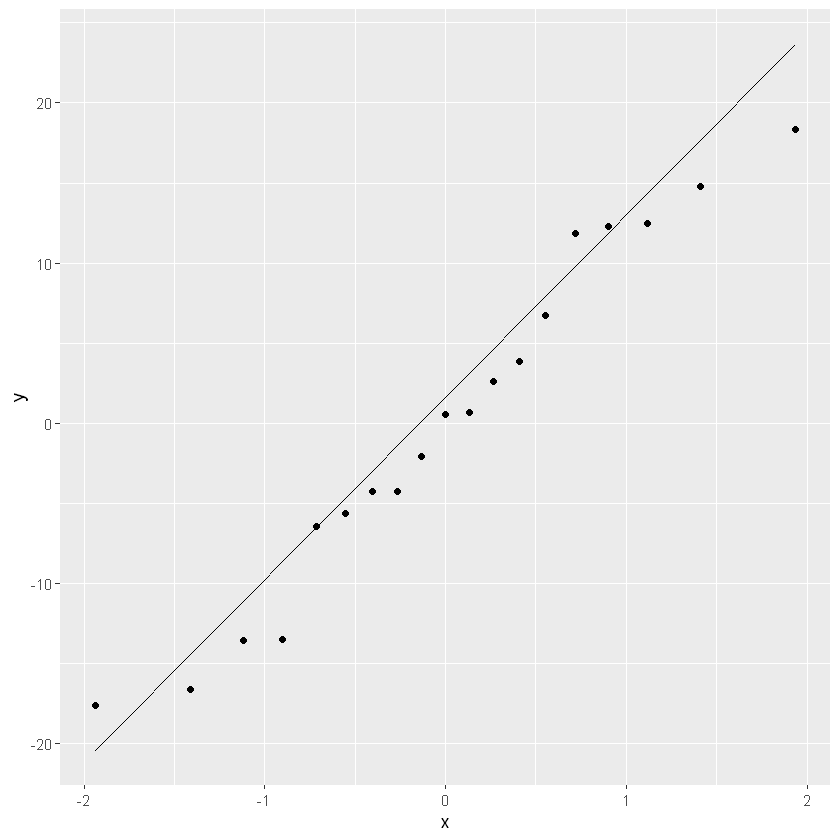

In [11]:
# Normal distribution of the error
ggplot(df, aes(sample = .resid)) +
  geom_qq() + 
  geom_qq_line()

Durbin-Watson-Test for auto correlation

In [12]:
# Autocorrelation
library(car)
durbinWatsonTest(my_lm, max.lag = 2)

Lade nötiges Paket: carData



 lag Autocorrelation D-W Statistic p-value
   1     -0.08248143      2.071356    0.83
   2      0.27009200      1.338201    0.21
 Alternative hypothesis: rho[lag] != 0

## Summary of model

In [13]:
summary(my_lm)


Call:
lm(formula = Weight ~ Height, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6807  -6.0642   0.5115   9.2846  18.3698 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -143.0269    32.2746  -4.432 0.000366 ***
Height         3.8990     0.5161   7.555 7.89e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.23 on 17 degrees of freedom
Multiple R-squared:  0.7705,	Adjusted R-squared:  0.757 
F-statistic: 57.08 on 1 and 17 DF,  p-value: 7.887e-07


In [14]:
glance(my_lm)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7705068,0.7570072,11.22625,57.07628,7.886816e-07,1,-71.85003,149.7001,152.5334,2142.488,17,19


In [15]:
tidy(my_lm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-143.02692,32.2745913,-4.431564,3.655789e-04
Height,3.89903,0.5160939,7.554885,7.886816e-07
